In [1]:
import pandas as pd

# Load the dataset
file_path = 'sentimentdataset.csv'
data = pd.read_csv(file_path)

# Basic Overview of the Dataset
print("Dataset Overview:")
print(data.describe(include='all'))
print("\n")

# Count of Unique Values in Each Column
print("Unique Values in Each Column:")
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")
print("\n")

Dataset Overview:
        Unnamed: 0                                               Text  \
count   732.000000                                                732   
unique         NaN                                                707   
top            NaN   A compassionate rain, tears of empathy fallin...   
freq           NaN                                                  3   
mean    369.740437                                                NaN   
std     212.428936                                                NaN   
min       0.000000                                                NaN   
25%     185.750000                                                NaN   
50%     370.500000                                                NaN   
75%     553.250000                                                NaN   
max     736.000000                                                NaN   

          Sentiment     Timestamp             User     Platform  \
count           732           732     

Distribution of Sentiments:
Sentiment
 Positive           44
 Joy                42
 Excitement         32
 Neutral            14
 Contentment        14
                    ..
 Adrenaline          1
 Harmony             1
 ArtisticBurst       1
 Radiance            1
 Elegance            1
Name: count, Length: 279, dtype: int64


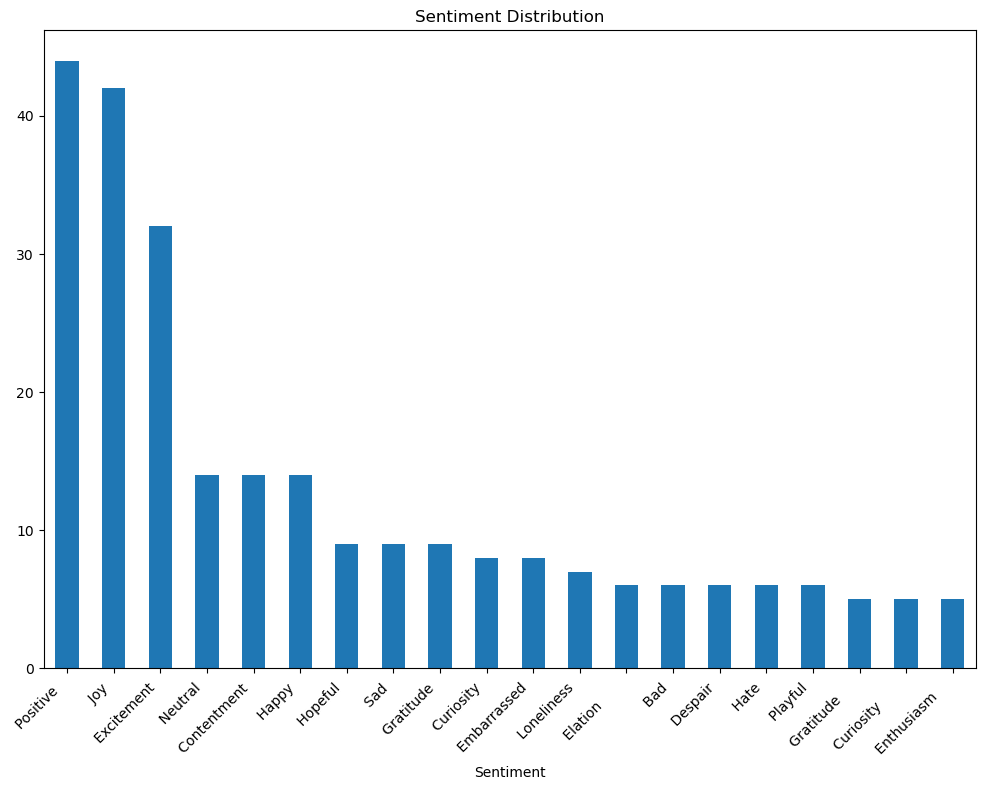

In [2]:
import matplotlib.pyplot as plt

# Distribution of Sentiments
print("Distribution of Sentiments:")
sentiment_counts = data['Sentiment'].value_counts()
print(sentiment_counts)

# Print the plot
plt.figure(figsize=(10,8))  # Increase figure size
sentiment_counts[:20].plot(kind='bar', title='Sentiment Distribution')  # Show top 20 sentiments only
plt.xticks(rotation=45, ha='right')  # Rotate x-tick labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Data
data = pd.read_csv('sentimentdataset.csv')

# Summary Statistics for Numerical Columns
print("Summary Statistics for Numerical Columns:")
summary_statistics = data.describe()
print(summary_statistics)

Summary Statistics for Numerical Columns:
       Unnamed: 0    Retweets       Likes         Year       Month  \
count  732.000000  732.000000  732.000000   732.000000  732.000000   
mean   369.740437   21.508197   42.901639  2020.471311    6.122951   
std    212.428936    7.061286   14.089848     2.802285    3.411763   
min      0.000000    5.000000   10.000000  2010.000000    1.000000   
25%    185.750000   17.750000   34.750000  2019.000000    3.000000   
50%    370.500000   22.000000   43.000000  2021.000000    6.000000   
75%    553.250000   25.000000   50.000000  2023.000000    9.000000   
max    736.000000   40.000000   80.000000  2023.000000   12.000000   

              Day        Hour  
count  732.000000  732.000000  
mean    15.497268   15.521858  
std      8.474553    4.113414  
min      1.000000    0.000000  
25%      9.000000   13.000000  
50%     15.000000   16.000000  
75%     22.000000   19.000000  
max     31.000000   23.000000  


In [4]:
# Correlation Analysis
# We have numerical columns like 'Likes' and 'Retweets' to correlate.
# Replace 'Likes' and 'Retweets' with the actual numerical columns.
print("\nCorrelation Matrix:")
correlation_matrix = data[['Likes', 'Retweets']].corr() 
print(correlation_matrix)


Correlation Matrix:
             Likes  Retweets
Likes     1.000000  0.998482
Retweets  0.998482  1.000000



Posts by Platform:
Platform
 Instagram     258
 Facebook      231
 Twitter       128
 Twitter       115
Name: count, dtype: int64


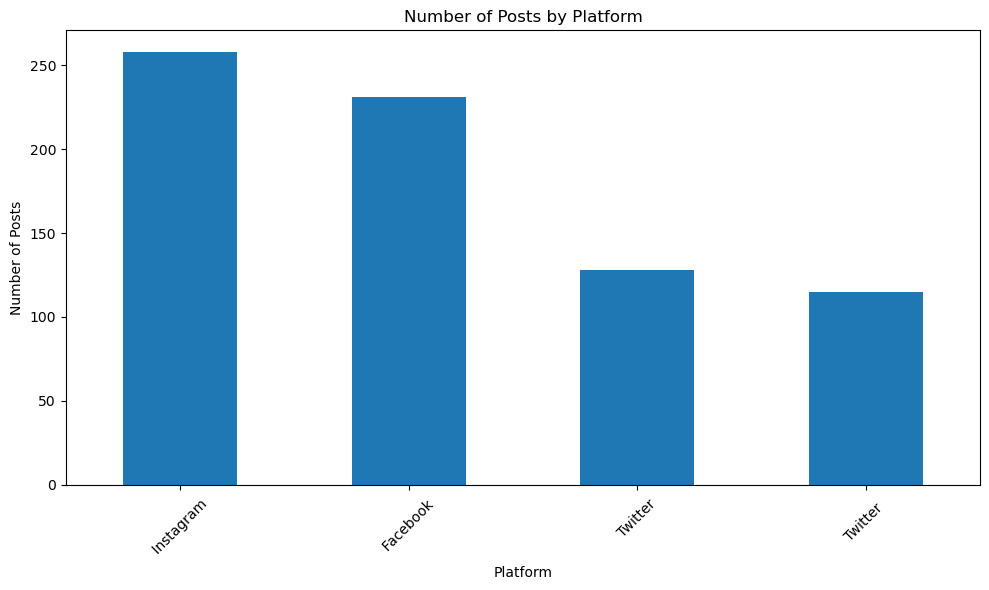

In [5]:
# Categorical Data Analysis
# This shows 'Platform' is a categorical column in the dataset.
# Replace 'Platform' with the actual categorical column to analyze.
print("\nPosts by Platform:")
posts_by_platform = data['Platform'].value_counts()
print(posts_by_platform)

# Plot the posts by platform as a bar chart for better visualization.
plt.figure(figsize=(10, 6))
posts_by_platform.plot(kind='bar')
plt.title('Number of Posts by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Load  dataset
data = pd.read_csv('sentimentdataset.csv')

# search function
def search_data(df, query):
    """
    Search the DataFrame `df` for the `query` string within all text columns.
    """
    return df[df.apply(lambda row: row.astype(str).str.contains(query, case=False).any(), axis=1)]

# Text widget for input
text = widgets.Text(
    value='',
    placeholder='Type your search term',
    description='Search:',
    disabled=False
)

# Button widget
button = widgets.Button(description="Search")

# Output widget for the results
output = widgets.Output()

# Function to update output with search results
def on_search_clicked(b):
    with output:
        output.clear_output()
        if text.value:
            # Display search results from the function
            display(search_data(data, text.value))
        else:
            print("Please enter a search term.")

# Button click event
button.on_click(on_search_clicked)

# Display widgets
display(text, button, output)

Text(value='', description='Search:', placeholder='Type your search term')

Button(description='Search', style=ButtonStyle())

Output()

In [7]:
import pandas as pd
import re
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to register a new user and save to the User_Information.csv
def register_user(username, password, file_path):
    # Load existing user data
    try:
        users_df = pd.read_csv(file_path)
    except FileNotFoundError:
        # If the file does not exist, create a new DataFrame
        users_df = pd.DataFrame(columns=['username', 'password'])

    # Check if the username already exists
    if username in users_df['username'].tolist():
        return "Username already exists."

    # Check password complexity (at least 8 characters including letters, numbers, and symbols)
    if not re.match(r'[A-Za-z0-9@#$%^&+=]{8,}', password):
        return "Password too weak."

    # Register new user
    new_user_df = pd.DataFrame([[username, password]], columns=['username', 'password'])
    users_df = pd.concat([users_df, new_user_df], ignore_index=True)

    # Save updated DataFrame to CSV
    users_df.to_csv(file_path, index=False)
    return "User registered successfully."

# Define the event handler for the Register button click event
def register_user_from_widget(b):
    # Call the register_user function with the widget values
    result = register_user(username_widget.value, password_widget.value, user_info_path)
    
    # Display the result in the output widget
    with output_widget:
        clear_output()
        print(result)
    
    # Optionally clear the input fields
    username_widget.value = ''
    password_widget.value = ''

# Path to User_Information.csv file
user_info_path = 'User_Information.csv' 

# Create the input widgets for username and password
username_widget = widgets.Text(
    value='',
    placeholder='Enter username',
    description='Username:',
    disabled=False
)

password_widget = widgets.Password(
    value='',
    placeholder='Enter password',
    description='Password:',
    disabled=False
)

# Create a button widget for registration
register_button = widgets.Button(
    description='Register',
    disabled=False,
    button_style='',  # styles: 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to register user',
)

# Create an output widget for displaying messages
output_widget = widgets.Output()

# Set the button's on_click event to the event handler function
register_button.on_click(register_user_from_widget)

# Display the widgets
display(username_widget, password_widget, register_button, output_widget)

Text(value='', description='Username:', placeholder='Enter username')

Password(description='Password:', placeholder='Enter password')

Button(description='Register', style=ButtonStyle(), tooltip='Click to register user')

Output()

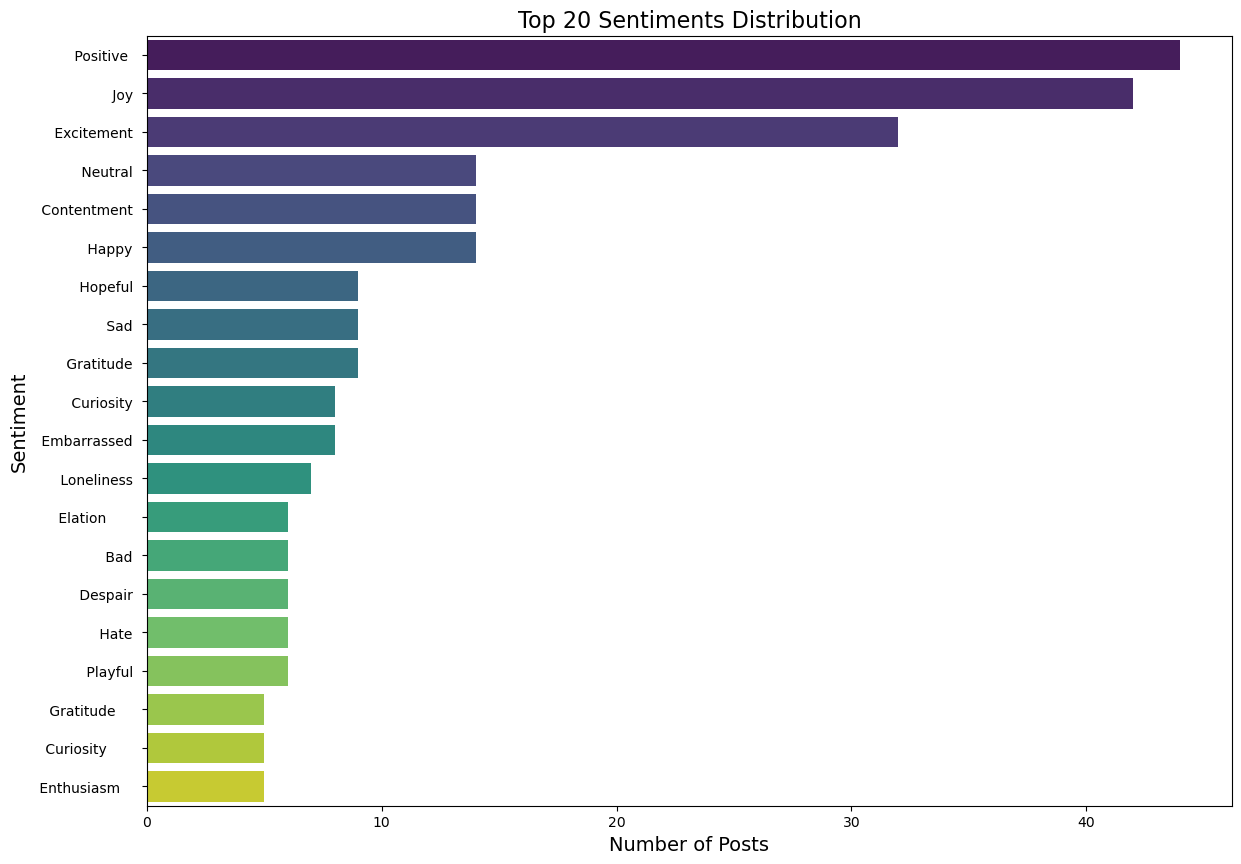

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'sentiment_counts' contains the count of posts for each sentiment
sentiment_counts = data['Sentiment'].value_counts()

# Limit to the top N categories for a clearer chart
top_categories = sentiment_counts.nlargest(20)  # You can change the number 20 as needed

plt.figure(figsize=(14, 10))  
sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis', orient='h')
plt.title('Top 20 Sentiments Distribution', fontsize=16)
plt.xlabel('Number of Posts', fontsize=14)
plt.ylabel('Sentiment', fontsize=14)
plt.yticks(fontsize=10)  
plt.xticks(fontsize=10)  
plt.show()

In [9]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import seaborn as sns
import matplotlib.pyplot as plt

# 'data' is the DataFrame that has been loaded with the 'Sentiment' column
# Calculate the top N sentiments
top_sentiments = data['Sentiment'].value_counts().nlargest(20).index.tolist()

# Dropdown for selecting sentiment from the top N
sentiment_dropdown = widgets.Dropdown(
    options=top_sentiments,
    value=top_sentiments[0],
    description='Sentiment:',
)

# Output widget for the filtered plot
plot_output = widgets.Output()

def update_plot(change):
    with plot_output:
        clear_output(wait=True)
        # Filter data to the selected sentiment
        filtered_data = data[data['Sentiment'] == change.new]
        # Generate plot for the filtered data
        sns.barplot(y=filtered_data['Sentiment'].value_counts().index, 
                    x=filtered_data['Sentiment'].value_counts().values, 
                    orient='h')
        plt.show()

# Observe dropdown
sentiment_dropdown.observe(update_plot, names='value')

# Display the dropdown and plot output
display(sentiment_dropdown, plot_output)

Dropdown(description='Sentiment:', options=(' Positive  ', ' Joy ', ' Excitement ', ' Neutral ', ' Contentment…

Output()

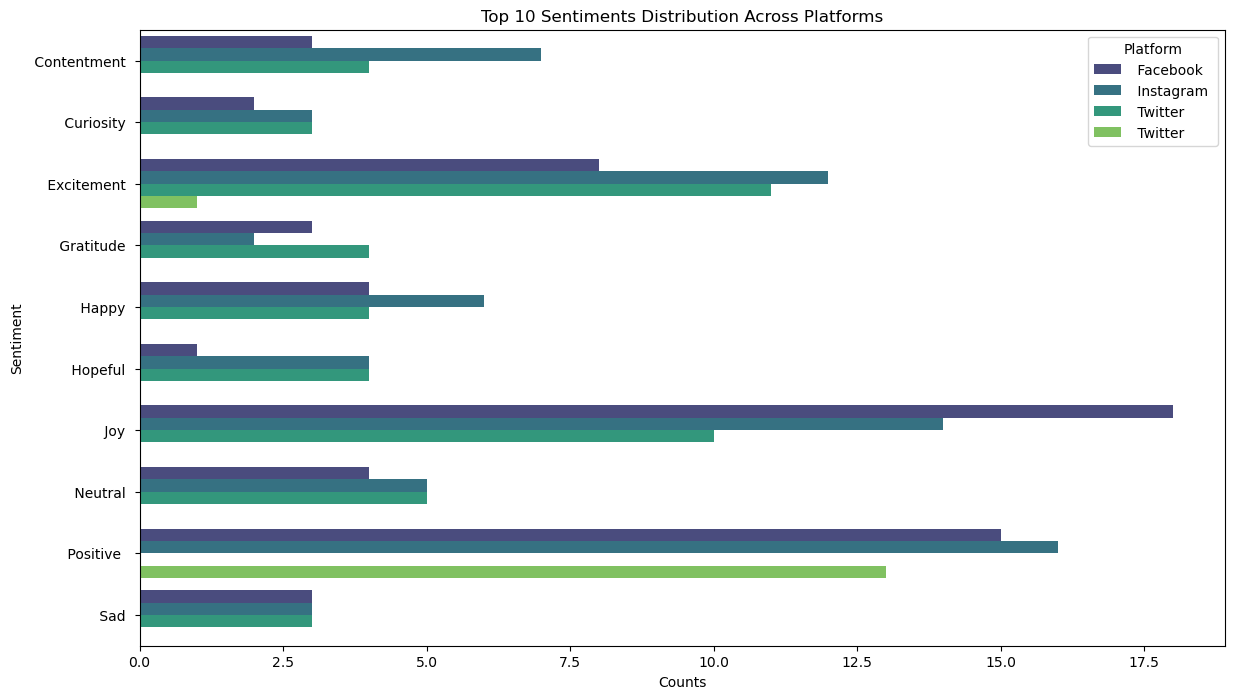

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = pd.read_csv('sentimentdataset.csv')

# Aggregate the data
sentiment_counts = data.groupby(['Platform', 'Sentiment']).size().reset_index(name='Counts')

# Identify the top 10 sentiments across all platforms
top_sentiments = sentiment_counts.groupby('Sentiment')['Counts'].sum().nlargest(10).index

# Filter the aggregated data to keep only the top sentiments
top_sentiment_counts = sentiment_counts[sentiment_counts['Sentiment'].isin(top_sentiments)]

# Visualize
plt.figure(figsize=(14, 8))
sns.barplot(x='Counts', y='Sentiment', hue='Platform', data=top_sentiment_counts, palette='viridis')

plt.title('Top 10 Sentiments Distribution Across Platforms')
plt.xlabel('Counts')
plt.ylabel('Sentiment')
plt.legend(title='Platform')
plt.show()

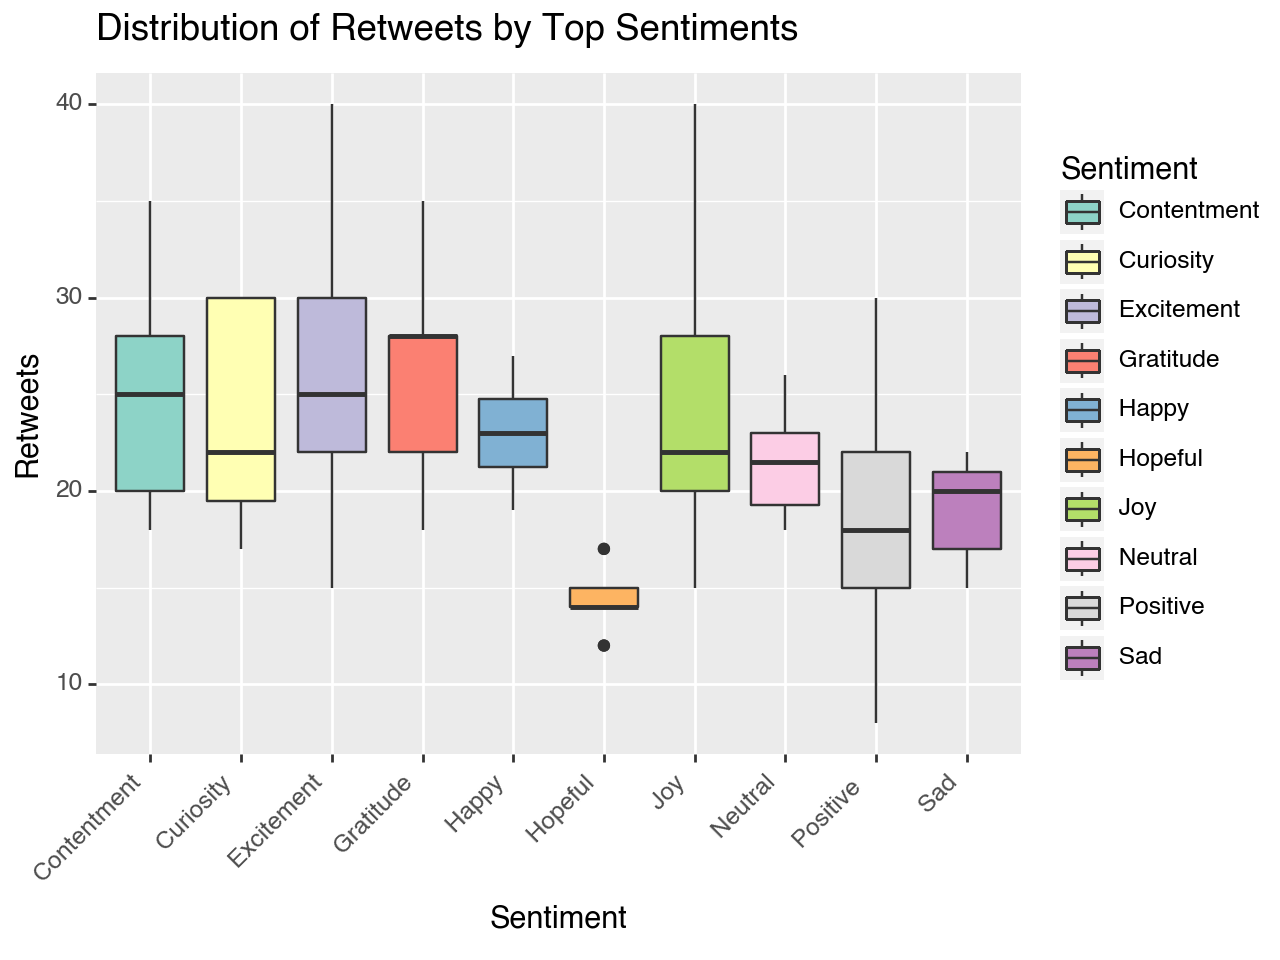

In [11]:
# Calculate the frequency of each sentiment
sentiment_counts = data['Sentiment'].value_counts()

# Identify the top 10 sentiments
top_sentiments = sentiment_counts.nlargest(10).index

# Filter the original DataFrame to include only the top 10 sentiments
top_sentiments_data = data[data['Sentiment'].isin(top_sentiments)]

# Box plot with the filtered data
from plotnine import ggplot, aes, geom_boxplot, labs, theme, element_text, scale_fill_brewer

plot = (ggplot(top_sentiments_data, aes(x='Sentiment', y='Retweets', fill='Sentiment')) +
        geom_boxplot() +
        theme(axis_text_x=element_text(rotation=45, hjust=1)) +  # Corrected rotation
        labs(title='Distribution of Retweets by Top Sentiments', x='Sentiment', y='Retweets') +
        scale_fill_brewer(type='qual', palette='Set3'))

# Display the plot
print(plot)

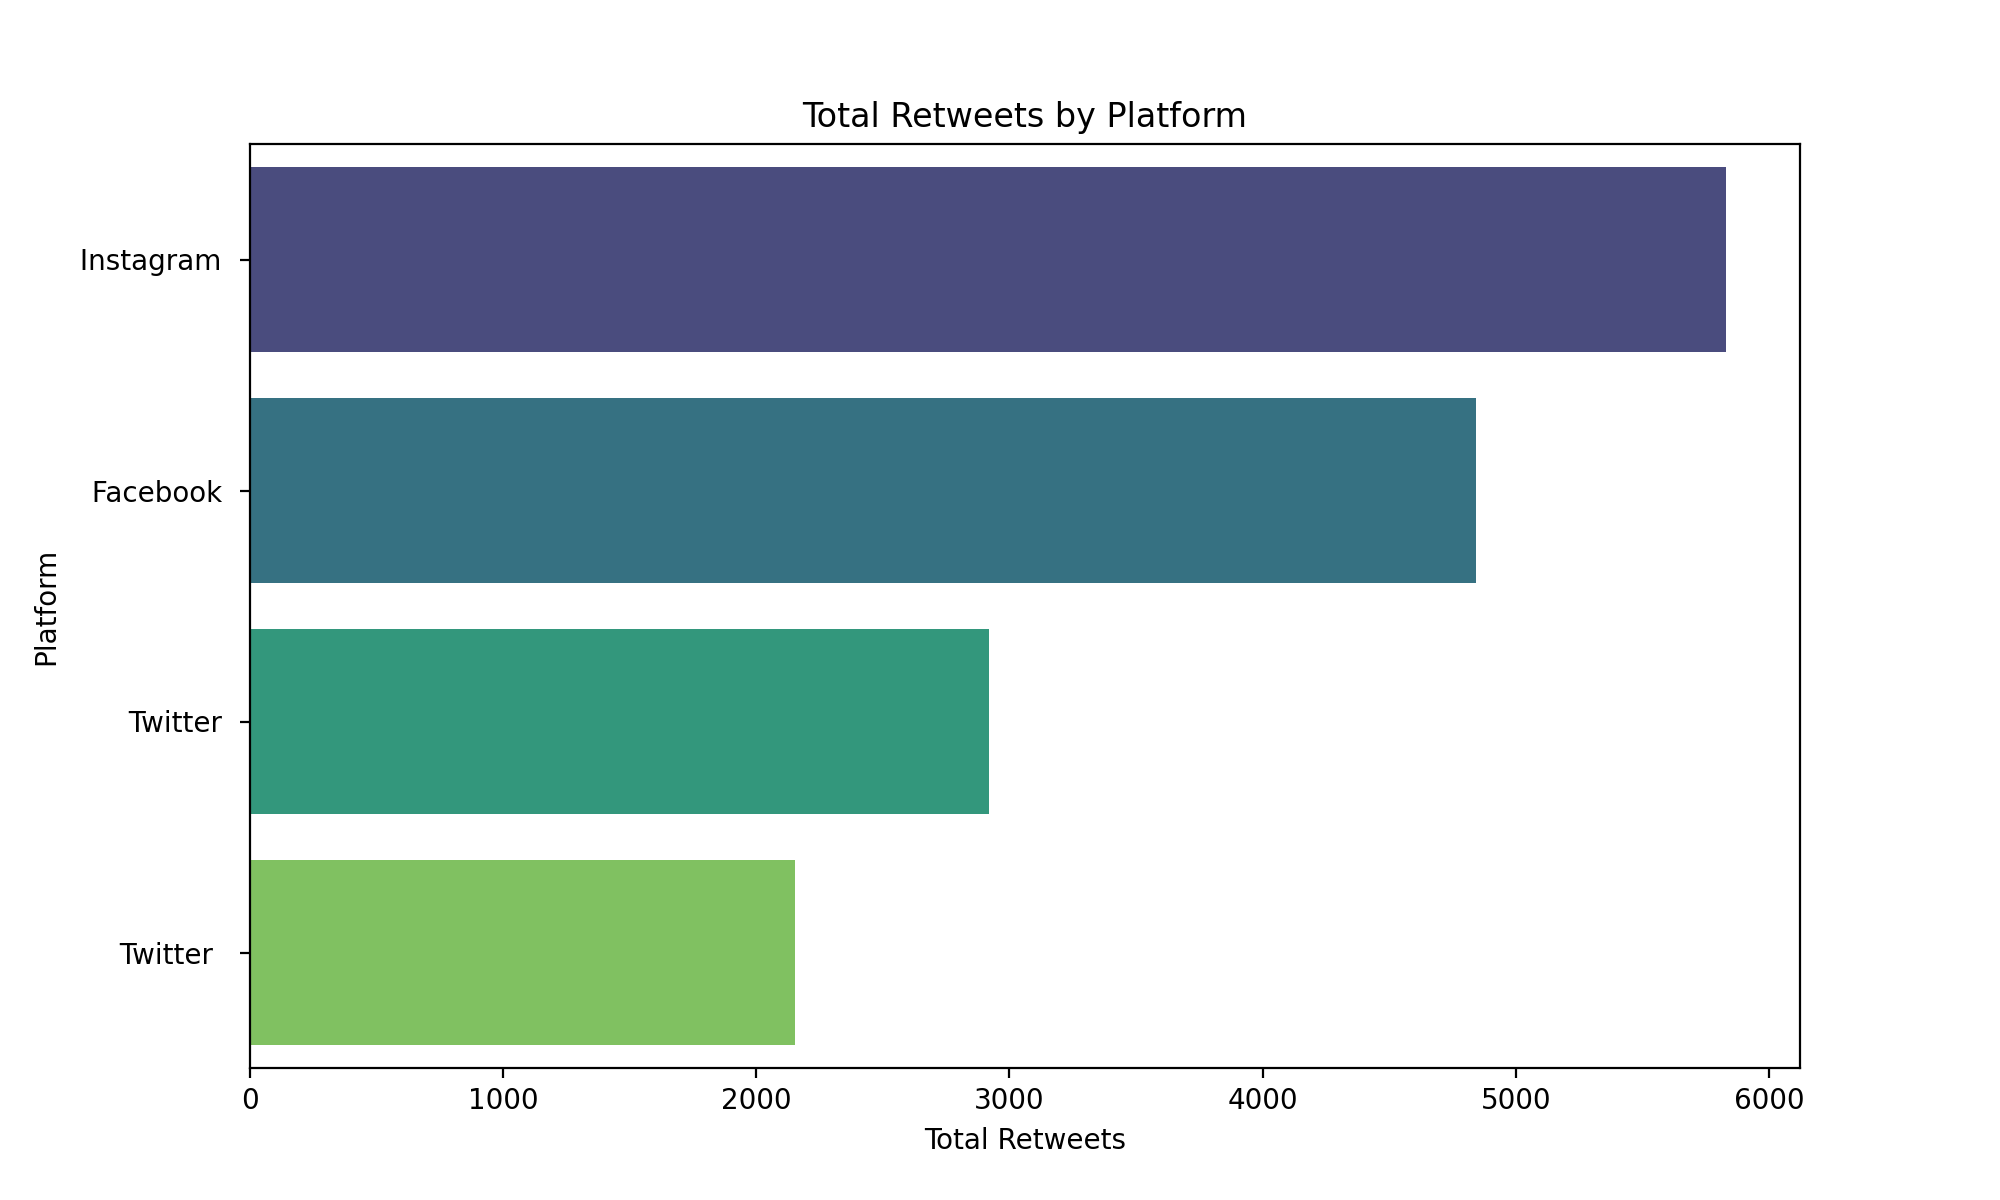

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate the total retweets by platform
platform_retweets = data.groupby('Platform')['Retweets'].sum().reset_index()

# Sort the platforms by the total retweets to make the plot easier to read
platform_retweets_sorted = platform_retweets.sort_values('Retweets', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Retweets', y='Platform', data=platform_retweets_sorted, palette='viridis')

plt.title('Total Retweets by Platform')
plt.xlabel('Total Retweets')
plt.ylabel('Platform')
plt.show()

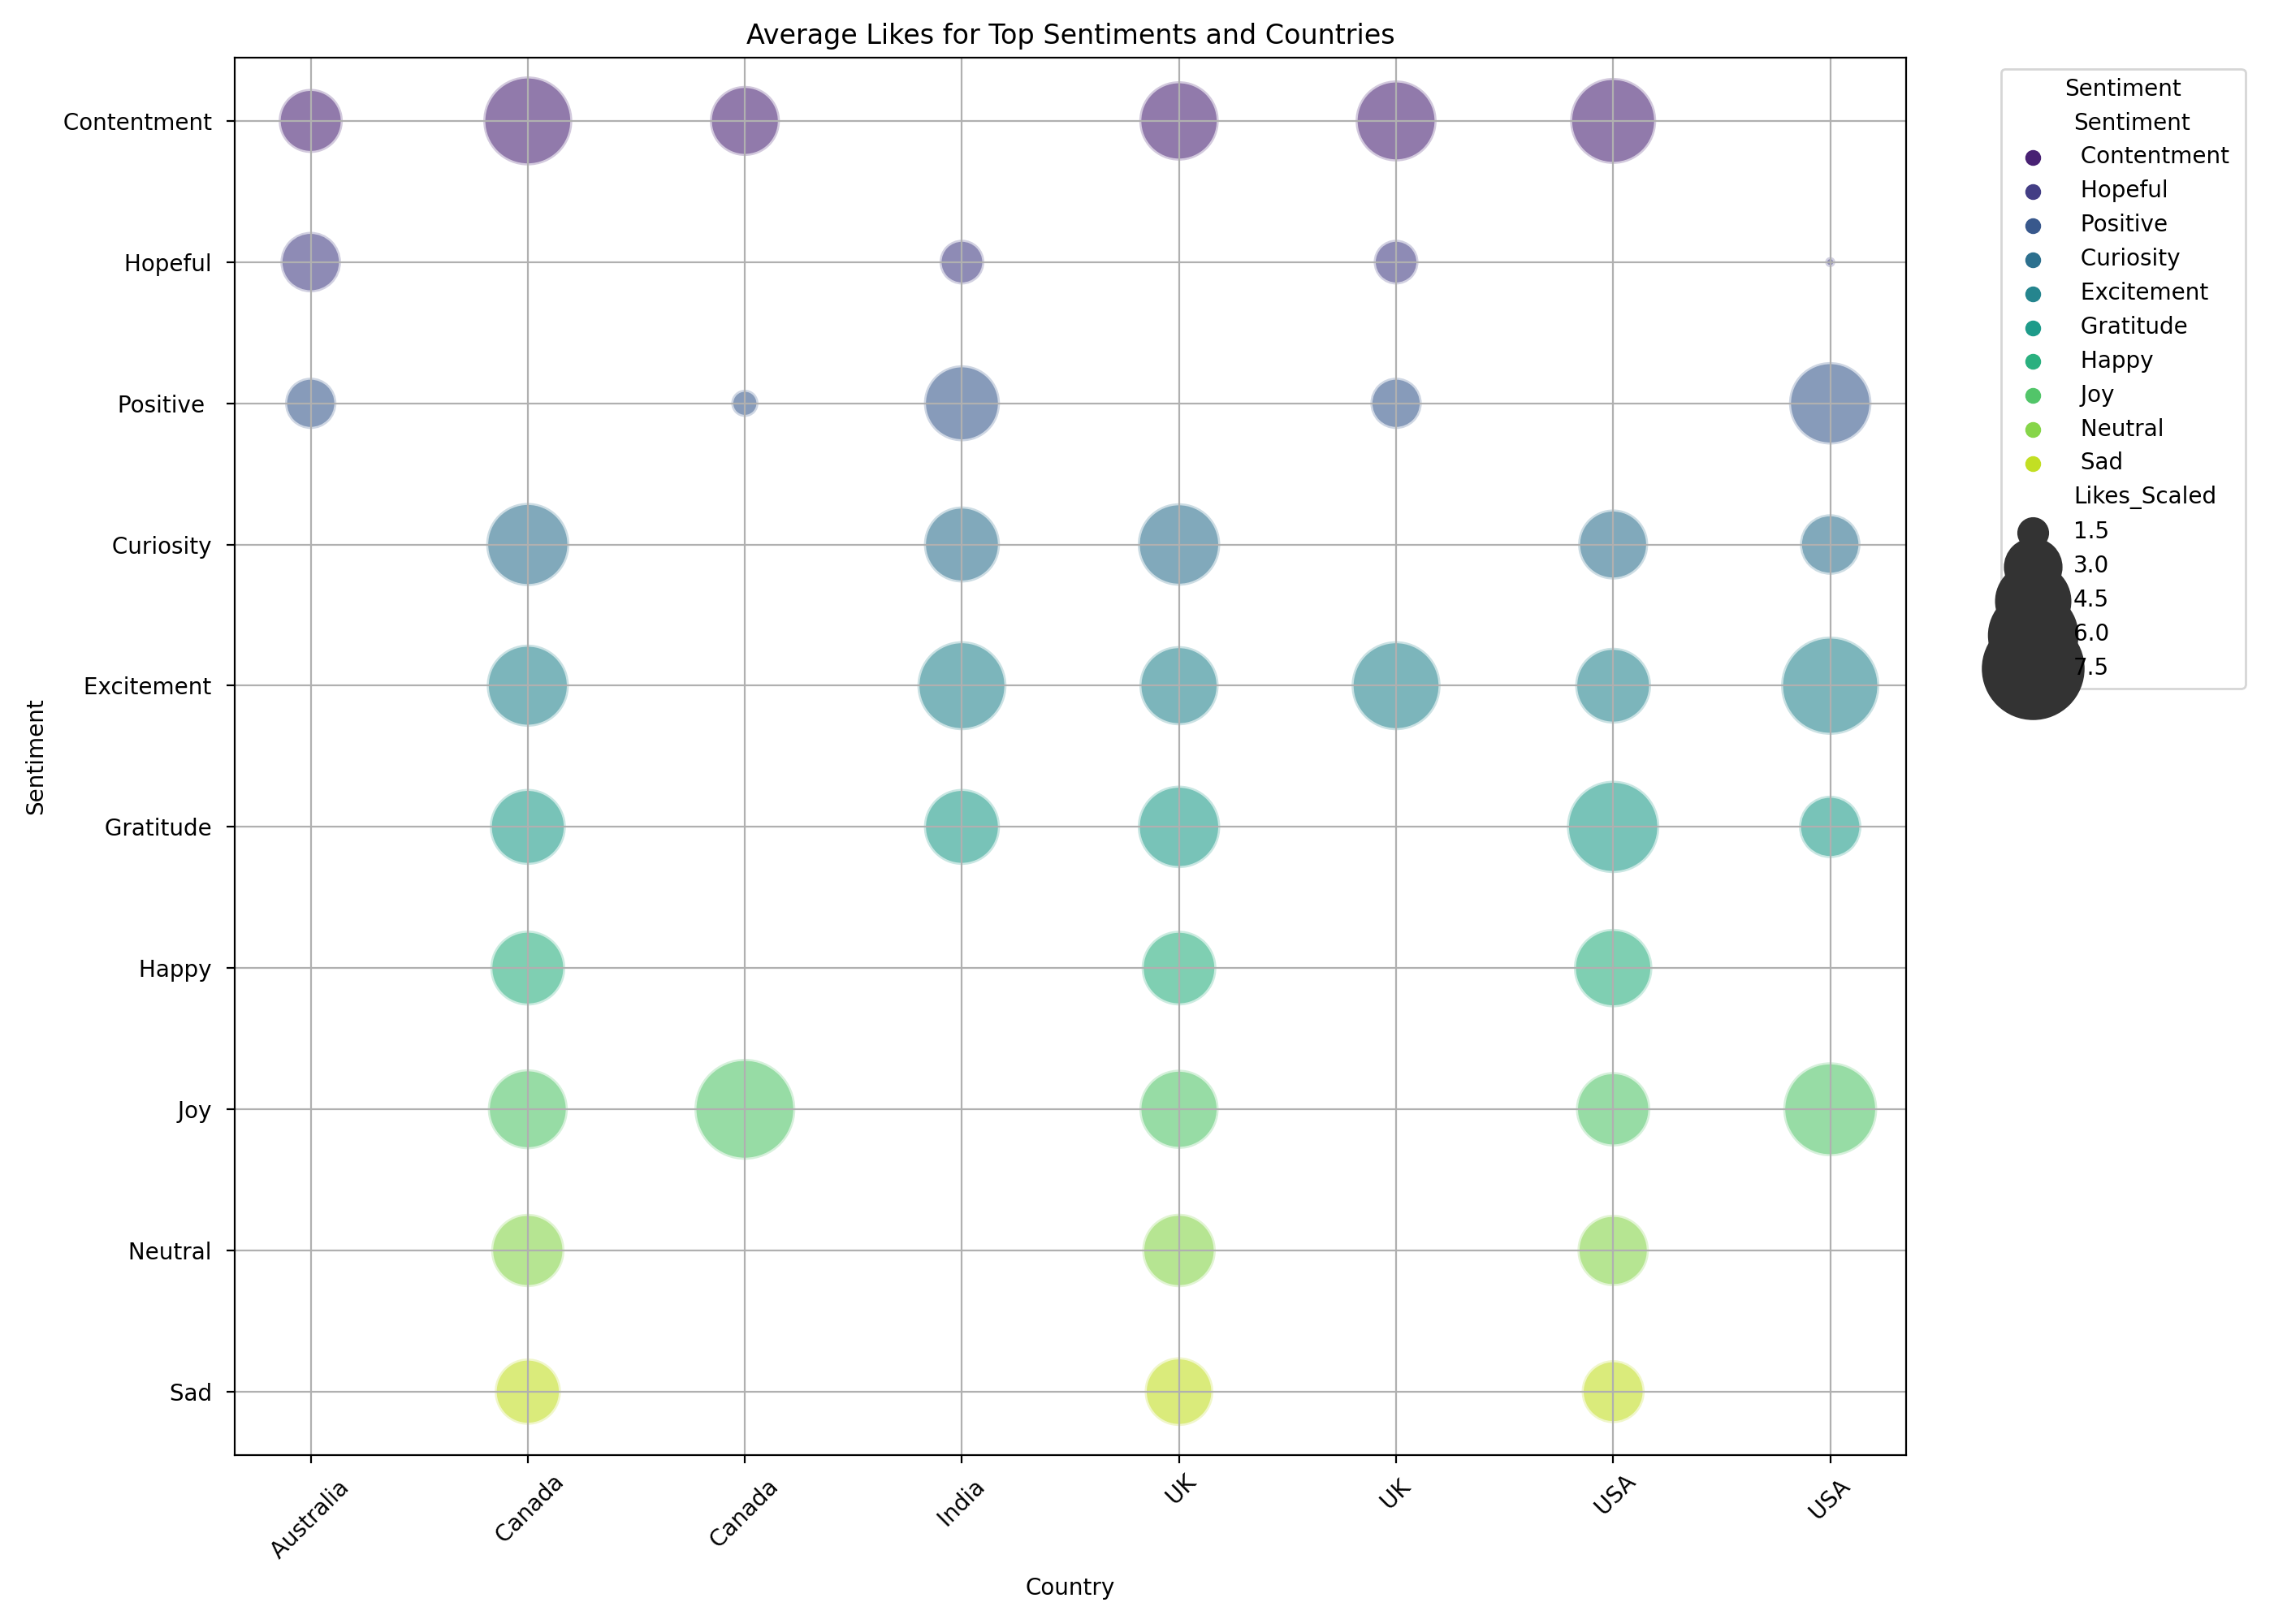

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 sentiments and countries
top_sentiments = data['Sentiment'].value_counts().nlargest(10).index
top_countries = data['Country'].value_counts().nlargest(10).index

# Filter the dataset for these top sentiments and countries
filtered_data = data[data['Sentiment'].isin(top_sentiments) & data['Country'].isin(top_countries)]

# Calculate the average likes for each sentiment within each country in the filtered dataset
avg_likes_filtered = filtered_data.groupby(['Country', 'Sentiment'])['Likes'].mean().reset_index()
avg_likes_filtered['Likes_Scaled'] = np.sqrt(avg_likes_filtered['Likes'] - avg_likes_filtered['Likes'].min() + 1)  # Scale for bubble size

# Create the bubble plot with the filtered data
plt.figure(figsize=(14, 10))
bubble_plot = sns.scatterplot(
    data=avg_likes_filtered, 
    x='Country', 
    y='Sentiment', 
    size='Likes_Scaled', 
    hue='Sentiment', 
    sizes=(20, 2000), 
    alpha=0.6, 
    edgecolor='w', 
    palette='viridis',
    legend='brief'
)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title='Sentiment')
plt.title('Average Likes for Top Sentiments and Countries')
plt.xlabel('Country')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
